In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Mise en commun des exports

## A. Importation des fichiers .csv

### a. Fichier ERP

In [2]:
df_erp = pd.read_csv('erp _V1.csv', sep = ';')
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [3]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
df_erp2 = df_erp[df_erp['onsale_web'] == 1]
df_erp2

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
787,6930,1,8.4,83,instock
792,7023,1,27.5,15,instock
793,7025,1,69.0,2,instock
822,7247,1,54.8,23,instock


In [5]:
df_erp.loc[(df_erp['stock_quantity'] ==0) & (df_erp['stock_status'] == 'instock')]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [6]:
df_erp[df_erp['product_id'].duplicated()]

,product_id,onsale_web,price,stock_quantity,stock_status


**Cette BDD comporte l'ensemble des références de vins, des prix et des stocks dans l'ERP. La clé primaire est la référence 'product_id'.**

On constate que:
- incohérence pour la ref 4954, qui n'a pas de stock mais est considéré "instock". 
- certaines reférences sont vendu sur le site tandis que d'autre ne le sont pas => vérification avec la BDD web
- pas d'absence de données et de doublon pour la colonne 'product_id' ==> clé primaire
- seul 717 références sont en vente sur le site web

**Il faut sélectionner uniquement ces 717 références pour la jointure avec la table web.**

### b. Fichier liaison

In [7]:
df_liaison = pd.read_csv('liaison_V1.csv', sep = ';')
df_liaison

,product_id_ERP,SKU_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [8]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id_ERP  825 non-null    int64 
 1   SKU_web         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [9]:
df_liaison[df_liaison['product_id_ERP'].duplicated()]

,product_id_ERP,SKU_web


**Cette BDD comporte les références ERP et les références web des vins vendus ainsi que la liaison entre les 2 références.**

On constate que:
- même nombre de ligne que 1er BDD ==>  adéquation en entre les références
- 91 références web sont des NaN ==> jointure entre les tables impossible pour ces référence
- référence 'product_id' complet et sans doublon ==> clé primaire

### c. Fichier Web

In [10]:
df_web = pd.read_csv('web_V1.csv', sep = ';')
df_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [11]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [12]:
df_web['post_type'].unique()

array(['product', nan, 'attachment'], dtype=object)

In [13]:
df_web['tax_status'].unique()

array(['taxable', nan], dtype=object)

In [14]:
df_web[df_web['sku'].duplicated()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [15]:
list_nan = df_web[df_web['sku'].isna()]
list_nan

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
list_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    0 non-null      object 
 1   virtual                85 non-null     int64  
 2   downloadable           85 non-null     int64  
 3   rating_count           85 non-null     int64  
 4   average_rating         2 non-null      float64
 5   total_sales            2 non-null      float64
 6   tax_status             2 non-null      object 
 7   tax_class              0 non-null      float64
 8   post_author            2 non-null      float64
 9   post_date              2 non-null      object 
 10  post_date_gmt          2 non-null      object 
 11  post_content           0 non-null      float64
 12  post_title             2 non-null      object 
 13  post_excerpt           2 non-null      object 
 14  post_status            2 non-null      object 
 15  comme

In [17]:
list_nan[list_nan['total_sales'].notna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


**Cette BDD comporte les références des produits vendu sur internet. Sa clé primaire est la référence 'sku'.**

On constate que:
- 2 références n'ont pas de sku mais n'ont pas été vendu ==> on peut  supprimer tous les sku NaN car cela n'aura pas d'influence sur la suite
- la présence d'attachments' dans la BDD. ==> seul les produits commercialisés en ligne doivent être présent ==> trier et garder que les produits
- BDD est beaucoup plus grand que les deux premiers (1513 contre 825) => présence de 798 doublons sur la colonne 'sku'.
- 85 références 'sku' sont des NaN
- 716 références sont taxables ==> les produits commercialisés doivent être taxables

**Il faut donc selectionner les lignes concernant les produits taxables ayant une référence SKU.**

## B. Nettoyage des données

In [45]:
df_web2 = df_web[(df_web['sku'].notna()) & (df_web['tax_status'] == 'taxable') & (df_web['post_type'] == 'product')]
df_web2

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
df_web2[df_web2['sku'].duplicated()]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


**vérification qu'll n'y a pas de doublons dans la colonne 'sku' et pas de NaN. La colonne 'sku' peut donc être clé primaire.**

## C. Jointures

In [20]:
df_intermediaire = pd.merge(df_erp2[['product_id', 'price', 'stock_quantity']], df_liaison[['SKU_web', 'product_id_ERP']], left_on= "product_id", right_on= "product_id_ERP")
df_intermediaire

,product_id,price,stock_quantity,SKU_web,product_id_ERP
0,3847,24.2,0,15298,3847
1,3849,34.3,0,15296,3849
2,3850,20.8,0,15300,3850
3,4032,14.1,0,19814,4032
4,4039,46.0,0,19815,4039
...,...,...,...,...,...
712,6930,8.4,83,16135,6930
713,7023,27.5,15,15891,7023
714,7025,69.0,2,15887,7025
715,7247,54.8,23,13127-1,7247


In [21]:
df_final = pd.merge(df_intermediaire, df_web2, left_on= "SKU_web", right_on= "sku")
df_final

,product_id,price,stock_quantity,SKU_web,product_id_ERP,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,24.2,0,15298,3847,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,34.3,0,15296,3849,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,20.8,0,15300,3850,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,14.1,0,19814,4032,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,46.0,0,19815,4039,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,8.4,83,16135,6930,16135,0,0,0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,7023,27.5,15,15891,7023,15891,0,0,0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,7025,69.0,2,15887,7025,15887,0,0,0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,7247,54.8,23,13127-1,7247,13127-1,0,0,0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# 2. Chiffre d'affaire (sans correction des valeurs)

#### Ajout de la colonne CA produit pour chaque produit:

In [22]:
df_final['CA_produit'] = df_final['price']*df_final['total_sales']
df_final

,product_id,price,stock_quantity,SKU_web,product_id_ERP,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA_produit
0,3847,24.2,0,15298,3847,15298,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,34.3,0,15296,3849,15296,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,20.8,0,15300,3850,15300,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,14.1,0,19814,4032,19814,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,46.0,0,19815,4039,19815,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,8.4,83,16135,6930,16135,0,0,0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
710,7023,27.5,15,15891,7023,15891,0,0,0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
711,7025,69.0,2,15887,7025,15887,0,0,0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
712,7247,54.8,23,13127-1,7247,13127-1,0,0,0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [23]:
df_final['CA_produit'].sum()

70568.6

**Le CA fait en ligne est donc de 70568,6 € depuis le début.**

# 3. Analyse de la variable Prix

## A. 1er Méthode: analyse univarié, méthode intercartile

Mise sous forme de data Frame

In [24]:
subset = pd.DataFrame(df_final['price'])
subset

,price
0,24.2
1,34.3
2,20.8
3,14.1
4,46.0
...,...
709,8.4
710,27.5
711,69.0
712,54.8


#### Calcul des mesures de tendance centrale, de dispersion, de forme

In [39]:
moyenne = subset['price'].mean()
mediane = subset["price"].median()
mode = subset["price"].mode()
variance = subset["price"].var(ddof=0)
ecartType = subset["price"].std(ddof=0)
skewness = subset["price"].skew()
kurtosis = subset["price"].kurtosis()
print("moyenne:\n", moyenne)
print("mediane:\n", mediane)
print("mode:\n", mode)
print("variance:\n", variance)
print("ecart-type:\n", ecartType)
print("skewness:\n", skewness)
print("kurtosis:\n", kurtosis)

moyenne:
 32.49313725490197
mediane:
 23.55
mode:
 0    19.0
dtype: float64
variance:
 772.3420677486691
ecart-type:
 27.791042941002935
skewness:
 2.58090126300337
kurtosis:
 10.088392064977288


#### Analyse intercartile:

Q1:
 14.1
Q3:
 42.150000000000006
IQR:
 28.050000000000004
minMoustache:
 -27.975
maxMoustache:
 84.22500000000001


<Figure size 864x576 with 0 Axes>

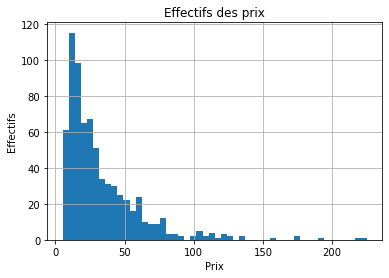

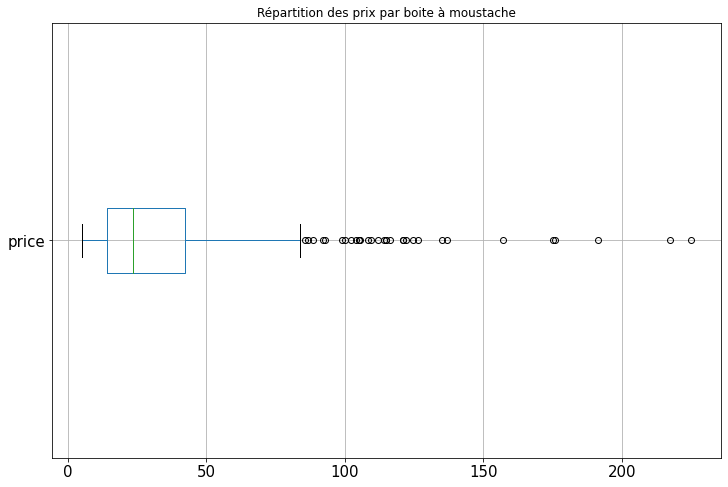

In [27]:
Q1 = np.percentile(subset, 25, interpolation = 'midpoint')
print('Q1:\n', Q1)
Q3 = np.percentile(subset, 75, interpolation = 'midpoint')
print('Q3:\n', Q3)
IQR = Q3 - Q1
print('IQR:\n',IQR)
minMoustache = Q1 - 1.5*IQR
print('minMoustache:\n', minMoustache)
maxMoustache = Q3 + 1.5*IQR
print('maxMoustache:\n', maxMoustache)

plt.figure(figsize=(12, 8))
subset.hist(bins=50)
plt.title("Effectifs des prix")
plt.xlabel("Prix")
plt.ylabel("Effectifs")
plt.show()

plt.figure(figsize=(12, 8))
df_final.boxplot(column="price", vert=False, fontsize=15)
plt.title("Répartition des prix par boite à moustache")
plt.show()

**Résultats semblables entre le boxplot et calcul intercartile.  
La seul difference se situe au niveau de la moustache minimum: -27.9 << 5  
Or on ne sait pas comment sont calculé les différentes données du boxplot de matplot.**

In [43]:
listOutliers = subset[(subset['price'] > maxMoustache) | (subset['price'] < minMoustache)]
listOutliers = listOutliers.sort_values('price')
listOutliers

,price,Zscore
205,85.6,1.910934
438,86.8,1.954114
65,88.4,2.011686
502,92.0,2.141225
602,93.0,2.177207
655,99.0,2.393104
63,100.0,2.429087
380,102.3,2.511848
222,104.0,2.573018
432,105.0,2.609001


In [29]:
len(listOutliers)

32

**Avec cette première méthode nous obtenons une liste de 32 outliers**

## B. 2eme Méthode: Z score

#### Calcul du Z score pour chaque élement de la population

In [40]:
subset['Zscore'] = (subset - subset.mean())/subset.std(ddof=0)
subset

,price,Zscore
0,24.2,-0.298410
1,34.3,0.065016
2,20.8,-0.420752
3,14.1,-0.661837
4,46.0,0.486015
...,...,...
709,8.4,-0.866939
710,27.5,-0.179667
711,69.0,1.313620
712,54.8,0.802664


#### Filtre des Zscore:

In [42]:
listOutliers2 = subset.loc[(subset['Zscore'] > 3) | (subset['Zscore'] < -3)]
listOutliers2 = listOutliers2.sort_values('price')
listOutliers2

,price,Zscore
648,116.4,3.019205
654,121.0,3.184726
657,121.0,3.184726
603,122.0,3.220709
511,124.8,3.321461
201,126.5,3.382632
642,135.0,3.688486
381,137.0,3.760451
221,157.0,4.480108
553,175.0,5.127798


In [32]:
len(listOutliers2)

14

**Avec cette deuxième méthode nous obtenons une liste nettement moins élevés d'outliers de 14 éléments.**

# Conclusion

**On constate une différence de résultats du simple au double entre les deux méthodes.  
Néanmoins si on analyse l'ensemble de leur outliers (de 85,6€ à 225€) et qu'on les comparent au prix du marché, on peut en conlure que ces prix ne sont pas exorbitant ou abérant et ne semble pas être des typo.**   
  
**Pour en avoir le coeur net, il faudrait vérifier ces outliers de manière individuelle pour s'assurer de la bonne cohérence de ces données**